In [39]:
import numpy as np
import matplotlib.pyplot as plt



In [40]:
x = [[1],[2],[3],[4],]
y = [1.3, 3.6, 4.3, 6.5]


x = np.array(x)
y = np.array(y)

In [41]:
x , y

(array([[1],
        [2],
        [3],
        [4]]),
 array([1.3, 3.6, 4.3, 6.5]))

In [42]:
x.shape, y.shape

((4, 1), (4,))

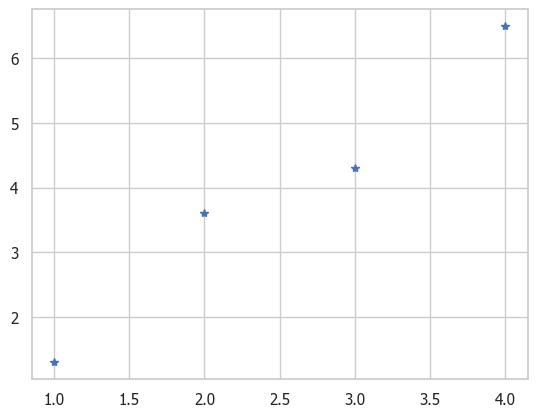

In [43]:
plt.plot(x, y, '*')
plt.show()

In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
model.coef_[0], model.intercept_

(np.float64(1.63), np.float64(-0.14999999999999947))

In [46]:
model.predict([[10]])

array([16.15])

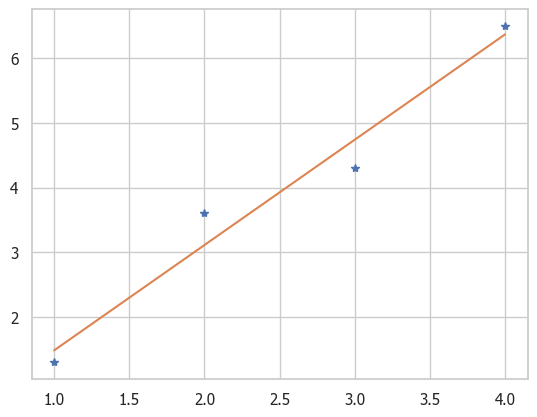

In [47]:
plt.plot(x, y, '*')
plt.plot(x, model.predict(x))
plt.show()

In [48]:
x = np.linspace(1, 360, 360 )
y = np.array([2 * i + (np.random.rand() - 0.5) * 20 for i in x])

x = x.reshape(-1, 1)

In [49]:
model = LinearRegression()
model.fit(x, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


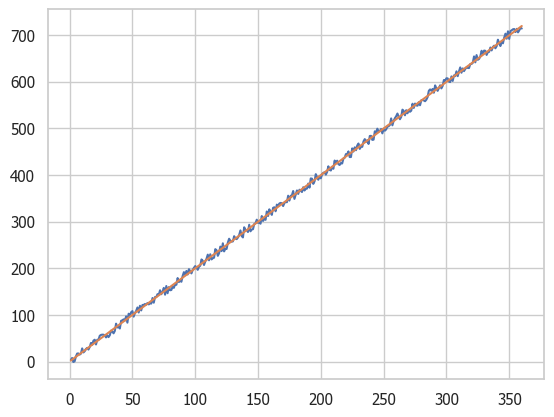

In [50]:
plt.plot(x, y)
plt.plot(x, model.predict(x))
plt.show()

In [51]:
x[0], y[0], model.predict(x[0].reshape(-1, 1))

(array([1.]), np.float64(3.7509254455629986), array([2.20485032]))

In [52]:
x[3], y[3], model.predict(x[3].reshape(-1, 1))

(array([4.]), np.float64(0.6999966530589736), array([8.19457132]))

In [53]:
error = np.array([abs(y[i] - model.predict(x[i].reshape(-1, 1))) for i in range(1, 100)])
mae = np.average(error)

print(mae)


4.623595982090458


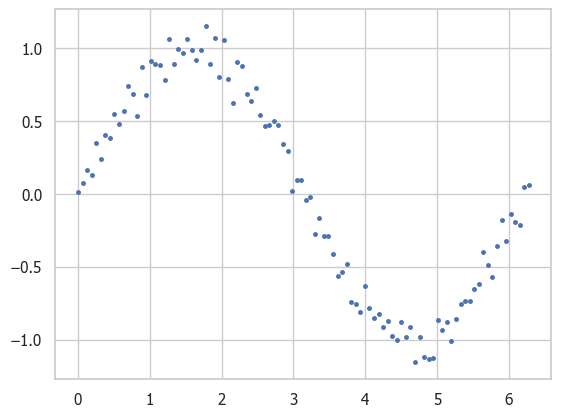

In [54]:
# Generate x values
x = np.linspace(0, 2*np.pi, 100)

# Generate sin values with noise
y = np.sin(x) + np.random.normal(0, 0.1, len(x))

# Create the plot
plt.plot(x, y, 'b.', label='sin(x) + noise', markersize=5)
plt.show()

In [55]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


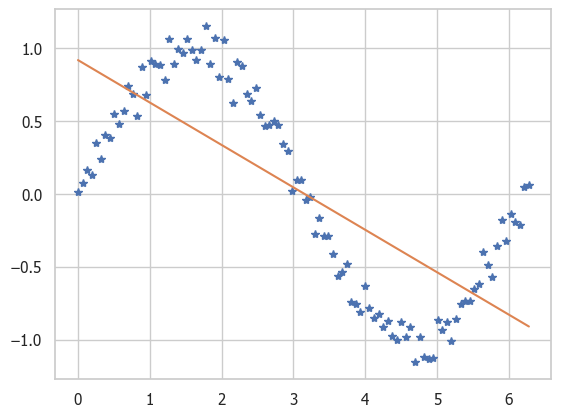

In [56]:
plt.plot(x, y, '*')
plt.plot(x, model.predict(x))
plt.show()

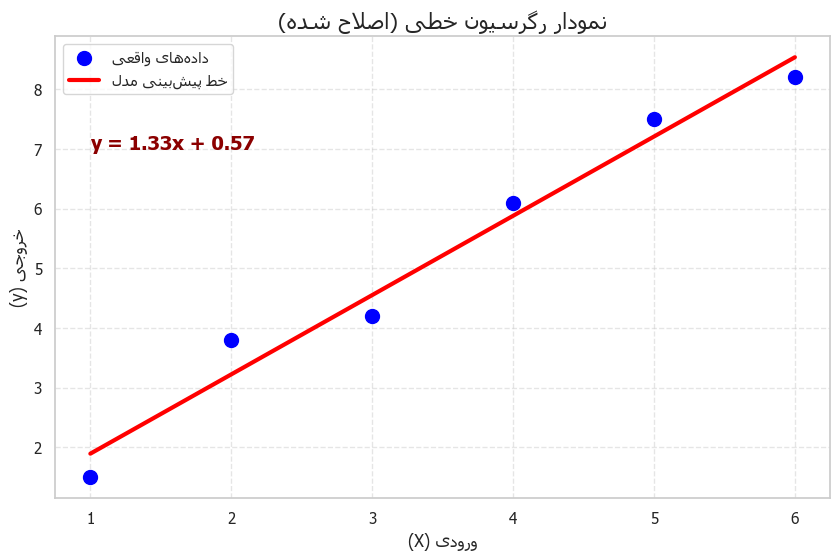

ﺪﺻﺭﺩ 97.3 :ﻝﺪﻣ ﺖﻗﺩ


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- بخش جدید: فارسی‌ساز ---
import arabic_reshaper
from bidi.algorithm import get_display

def fa(text):
    """این تابع متن فارسی را برای نمایش در نمودار اصلاح می‌کند"""
    reshaped_text = arabic_reshaper.reshape(text)  # چسباندن حروف
    bidi_text = get_display(reshaped_text)         # اصلاح جهت راست‌چین
    return bidi_text

# تنظیمات ظاهری
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Tahoma'  # فونت استاندارد ویندوز

# 1. داده‌ها
X_raw = np.array([[1], [2], [3], [4], [5], [6]])
y_raw = np.array([1.5, 3.8, 4.2, 6.1, 7.5, 8.2])

# 2. مدل‌سازی
model = LinearRegression()
model.fit(X_raw, y_raw)
y_pred = model.predict(X_raw)

# 3. محاسبات
r2 = r2_score(y_raw, y_pred)
equation = f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}"

# 4. رسم نمودار اصلاح شده
plt.figure(figsize=(10, 6))

# نقاط و خط با متن فارسی اصلاح شده
plt.scatter(X_raw, y_raw, color='blue', s=100, label=fa('داده‌های واقعی'))
plt.plot(X_raw, y_pred, color='red', linewidth=3, label=fa('خط پیش‌بینی مدل'))

plt.title(fa('نمودار رگرسیون خطی (اصلاح شده)'), fontsize=16)
plt.xlabel(fa('ورودی (X)'), fontsize=12)
plt.ylabel(fa('خروجی (y)'), fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# نمایش فرمول روی نمودار
plt.text(1, 7, equation, fontsize=14, color='darkred', weight='bold')

plt.show()

print(fa(f"دقت مدل: {r2*100:.1f} درصد"))